In [45]:
import pandas as pd

# Charger le dataset
df = pd.read_csv("TweetsElonMusk.csv")

# Aperçu des données
print(df.head())
print(df.info())



                    id      conversation_id                created_at  \
0  1381273474400800773  1381002894032347138  2021-04-11 18:50:33 EEST   
1  1381273076709478403  1372444955050971142  2021-04-11 18:48:58 EEST   
2  1381258144916008964  1381230136918433792  2021-04-11 17:49:38 EEST   
3  1381221447322935303  1381221447322935303  2021-04-11 15:23:49 EEST   
4  1381129584435818496  1381079981485252611  2021-04-11 09:18:47 EEST   

         date      time  timezone   user_id  username       name  place  ...  \
0  2021-04-11  18:50:33       300  44196397  elonmusk  Elon Musk    NaN  ...   
1  2021-04-11  18:48:58       300  44196397  elonmusk  Elon Musk    NaN  ...   
2  2021-04-11  17:49:38       300  44196397  elonmusk  Elon Musk    NaN  ...   
3  2021-04-11  15:23:49       300  44196397  elonmusk  Elon Musk    NaN  ...   
4  2021-04-11  09:18:47       300  44196397  elonmusk  Elon Musk    NaN  ...   

  geo source user_rt_id user_rt retweet_id  \
0 NaN    NaN        NaN     NaN   

In [37]:
# Liste des noms de colonnes avec des indices
for i, col in enumerate(df.columns):
    print(f"Index {i}: '{col}'")


Index 0: '0'
Index 1: '1'
Index 2: '2'
Index 3: '3'
Index 4: '4'
Index 5: '5'
Index 6: '6'
Index 7: '7'
Index 8: '8'
Index 9: '9'
Index 10: '10'
Index 11: '11'
Index 12: '12'
Index 13: '13'
Index 14: '14'
Index 15: '15'
Index 16: '16'
Index 17: '17'
Index 18: '18'
Index 19: '19'
Index 20: '20'
Index 21: '21'
Index 22: '22'
Index 23: '23'
Index 24: '24'
Index 25: '25'
Index 26: '26'
Index 27: '27'
Index 28: '28'
Index 29: '29'
Index 30: '30'
Index 31: '31'
Index 32: '32'
Index 33: '33'
Index 34: '34'
Index 35: '35'


In [51]:
import re

def nettoyer_texte(texte):
    texte = re.sub(r'http\S+', '', texte)  # Supprimer les URL
    texte = re.sub(r'@\w+', '', texte)    # Supprimer les mentions
    texte = re.sub(r'#\w+', '', texte)    # Supprimer les hashtags
    texte = re.sub(r'[^\w\s]', '', texte) # Supprimer la ponctuation
    texte = texte.lower()                # Convertir en minuscules
    return texte

df['Cleaned_Tweet'] = df['tweet'].apply(nettoyer_texte)


In [53]:
#Divisez les tweets en mots.
import nltk
nltk.download('punkt')

def tokenizer(texte):
    return nltk.word_tokenize(texte)

df['Tokens'] = df['Cleaned_Tweet'].apply(tokenizer)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [55]:
# Retirez les mots sans valeur informative (stopwords).
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def supprimer_stopwords(tokens):
    return [mot for mot in tokens if mot not in stop_words]

df['Tokens'] = df['Tokens'].apply(supprimer_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
#Réduisez les mots à leur forme de base.
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

df['Lemmatized_Tokens'] = df['Tokens'].apply(lemmatize)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [63]:
#Convertissez les tweets en vecteurs numériques
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Cleaned_Tweet'])


In [65]:
#Clustering avec K-Means
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0)  # Choisissez k=10 comme exemple
df['Cluster'] = kmeans.fit_predict(X)


In [67]:
#Clustering avec Fuzzy C-Means
import skfuzzy as fuzz

def fuzzy_cmeans(X, c):
    X = X.toarray()
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
        X.T, c=c, m=2, error=0.005, maxiter=1000)
    cluster_membership = u.argmax(axis=0)
    return cluster_membership

df['Fuzzy_Cluster'] = fuzzy_cmeans(X, c=10)


In [71]:
#Sélection du Tweet représentatif par Cluster : Choisissez un tweet central dans chaque cluster.
representatives = []
for cluster in range(10):  # Nombre de clusters
    cluster_tweets = df[df['Cluster'] == cluster]
    representatives.append(cluster_tweets.iloc[0]['tweet'])  # Premier tweet du cluster
print(representatives)


['@engineers_feed Due to lower gravity, you can travel from surface of Mars to surface of Earth fairly easily with a single stage rocket. Earth to Mars is vastly harder.', '@agnostoxxx @CathieDWood @ARKInvest Trust the shrub', '@vincent13031925 For now. Costs are decreasing rapidly.', '@WholeMarsBlog If you don’t say anything &amp; engage Autopilot, it will soon guess based on time of day, taking you home or to work or to what’s on your calendar', '@louisssdev @flcnhvy Coming soon. Crazy number of launches this year!', '@allrocketsboi True', '@AustinTeslaClub @OwenSparks_ @WholeMarsBlog Good point.   Next major software rev will do much better with automating wipers, seat heating &amp; defrost.   Probable seat settings just based on occupant mass distribution should be possible.', 'No it doesn’t hurt at all 🩸  https://t.co/NnL6o1si0V', '@lexfridman @neuralink Yes', '@ICannot_Enough @AloysiusFekete @RationalEtienne @biogirl09 @ErcXspace Exactly']


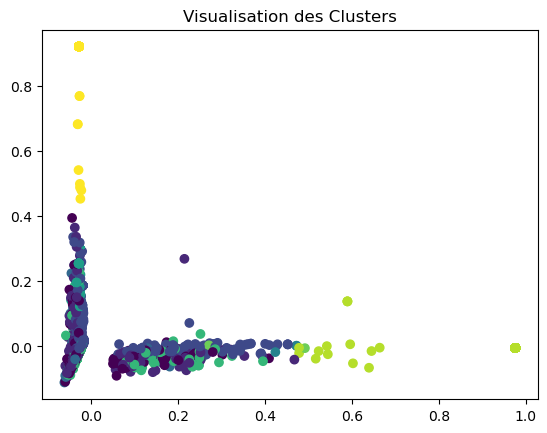

In [73]:
#Utilisez une réduction de dimension comme PCA pour visualiser les clusters.
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df['Cluster'], cmap='viridis')
plt.title("Visualisation des Clusters")
plt.show()


In [75]:
df.to_csv("TweetsElonMusk_Clustered.csv", index=False)
